In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Add necessary libraries


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

**Since we have lot of columns  want to show all the columns in the output. Set no of columns and number of rows to be shown**

In [6]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

**Load data to a data frame. Separate features and label**

In [7]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv") 
X = df.drop("target", axis=1) 
y = df['target'] 

**Load important libraries**

# EDA on the train dataset


**Quick glance on the data - select top 5 records**




In [8]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

**Get the structure of the data in terms of rows and columns**

In [9]:
df.shape

(100000, 76)

**Get basic information on the columns such as column name , how many non null columns and data type**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

**Get missing values info. Following code gives us all the columns with 1 or more missing values. 33 missing columns observed out of 76**

In [11]:
missing_values = pd.DataFrame(df.isnull().sum(),columns=['Missing_Count'])
missing_values[missing_values['Missing_Count']>0]

#len(missing_values)


,Missing_Count
RealTimeProtectionState,66
AntivirusConfigID,76
NumAntivirusProductsInstalled,76
NumAntivirusProductsEnabled,76
CityID,623
IsSystemProtected,76
SMode,981
IEVersionID,107
FirewallEnabled,166
EnableLUA,19


**Check numeric columns and see any pattern**

**Look at the numerical clumns and see if we can get some insights using describe function which lists number of values in the column, mean and std deviation, min and max values , 25% 50% and 75% data distributions** 

Above code considered only numerical columns. By default function uses only numerical columns. Looking through the code gives us some important info
* IsBetaUser,AutoSampleSubmissionEnabled,IsFlightsDisabled	 does not convey us any info since it has 0 as value for all the records
* Several id columns (AntivirusConfigID,CountryID etc)  are categorized as numbers. They dont represent any numeric measures and should be considered as category
* Several binary columns represents as 0 or 1  eg: IsPassiveModeEnabled , HasTpm

In [12]:
df.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,100000.000000,100000.000000,99924.000000,100000.0,99019.000000,99893.000000,99834.000000,99981.000000,99788.000000,99772.000000,99915.000000,99915.000000,99915.000000,9.989000e+04,9.989000e+04,100000.00000,99849.000000,99928.000000,99928.000000,99928.000000,9.948500e+04,100000.000000,100000.000000,99887.000000,100000.000000,100000.000000,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,15917.208720,578.403380,0.955326,0.0,0.000505,124.053848,0.980067,0.996569,2209.573265,238780.914154,4.011500,4.530711,2367.693069,5.158619e+05,3.819905e+05,0.08140,6132.087442,16.708674,1552.230416,898.253192,1.118069e+09,15990.596350,986.531360,14.519267,60.030870,0.000520,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,1943.421132,247.240971,0.206588,0.0,0.022466,33.535395,0.139771,0.266669,1300.863891,71708.483379,2.033075,1.288050,837.822392,3.525624e+05,3.246240e+05,0.27345,4813.882548,6.031598,363.438980,213.695880,1.884682e+09,1810.756601,2971.429862,10.142233,44.715508,0.022798,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,7601.000000,16.000000,0.000000,0.0,0.000000,39.000000,0.000000,0.000000,46.000000,22.000000,1.000000,1.000000,3.000000,1.228800e+04,1.088000e+04,0.00000,512.000000,5.300000,400.000000,300.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208410e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,0.0,0.000000,135.000000,1.000000,1.000000,2102.000000,246528.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.567655e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182

**See how objects are captured for object data type need to use include = "object"**

In [13]:
# For categorical column
df.describe(include="object")

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,SKUEditionName,MDC2FormFactor,DeviceFamily,PrimaryDiskType,ChassisType,PowerPlatformRole,NumericOSVersion,OSArchitecture,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99977,99998,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99976
unique,99835,2,37,69,2735,4,3,7,9,281,8,11,2,4,28,9,221,3,13,20,18,9,6,4,6,7,2695,112
top,8e0523438a5ca48323f50b2c47f6d31a,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,Notebook,Windows.Desktop,HDD,Notebook,Mobile,10.0.17134.228,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,99771,45219,62119,1274,98344,91262,98368,45837,42964,62863,64547,99971,66202,59459,69874,17069,91281,46909,39275,39273,32033,45154,89860,52195,94153,1274,20905


**Some interesting observations**
* MachineId has 99835 unique values and also dont give any meaningful info
* Product name has 99771 values for win8defender and only 2 unique values are available
* There are 2 Date columns which needs to be converted to date type they are DateAs and DateOS 

**Distribution of target variable , it is observed that the dataset is balanced**

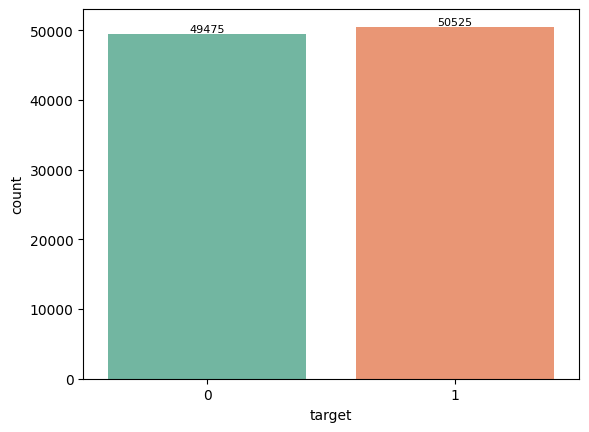

In [14]:
ax=sns.countplot(x=df['target'].astype(str), palette='Set2')
for p in ax.containers:
    ax.bar_label(p, fmt='%d', fontsize=8, label_type='edge')

plt.show()

# Feature Engineering

Feature engineer date columns. Convert date to year, month and day. Also added columns to check for periodicity

In [15]:
X['DateAS'] = pd.to_datetime(X['DateAS'])

# Feature engineering
X['DateAS_year'] = X['DateAS'].dt.year
X['DateAS_month'] = X['DateAS'].dt.month
X['DateAS_day_of_week'] = X['DateAS'].dt.dayofweek

# Cyclical encoding
X['month_sin_DateAS'] = np.sin(2 * np.pi * X['DateAS_month'] / 12)
X['month_cos_DateAS'] = np.cos(2 * np.pi * X['DateAS_month'] / 12)


X['DateOS'] = pd.to_datetime(X['DateOS'])
# Feature engineering
X['DateOS_year'] = X['DateOS'].dt.year
X['DateOS_month'] = X['DateOS'].dt.month
X['DateOS_day_of_week'] = X['DateOS'].dt.dayofweek


# Cyclical encoding
X['month_sin_DateOS'] = np.sin(2 * np.pi * X['DateOS_month'] / 12)
X['month_cos_DateOS'] = np.cos(2 * np.pi * X['DateOS_month'] / 12)



****Drop date columns after feature engineering****

In [16]:
X.drop(['DateAS','DateOS'], axis=1,inplace= True)

**Convert some columns to category prominently id columns**

In [17]:
categorical_columns = ['AntivirusConfigID', 'CountryID', 'CityID','GeoRegionID','LocaleEnglishNameID','OSBuildNumber', 'OSProductSuite','EnableLUA', 'OEMNameID',
       'OEMModelID','ProcessorManufacturerID',  'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID','OSUILocaleID', 'ProcessorModelID','FirmwareManufacturerID', 'FirmwareVersionID','RegionIdentifier']
X[categorical_columns] = X[categorical_columns].astype('category')

**Also date fields considered objects needs to be converted and treated differently**

**Drop unwanted or 0 variance columns**

In [18]:
X.drop(['IsBetaUser','IsFlightsDisabled','AutoSampleSubmissionEnabled','MachineID'], axis=1,inplace= True )

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 79 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   ProductName                         100000 non-null  object  
 1   EngineVersion                       100000 non-null  object  
 2   AppVersion                          100000 non-null  object  
 3   SignatureVersion                    100000 non-null  object  
 4   RealTimeProtectionState             99934 non-null   float64 
 5   IsPassiveModeEnabled                100000 non-null  int64   
 6   AntivirusConfigID                   99924 non-null   category
 7   NumAntivirusProductsInstalled       99924 non-null   float64 
 8   NumAntivirusProductsEnabled         99924 non-null   float64 
 9   HasTpm                              100000 non-null  int64   
 10  CountryID                           100000 non-null  category
 11  CityID        

# Preprocessing

**Separate numerical columns and string/categorical columns**

In [20]:
# Separate numerical columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Separate string/categorical columns
Cat_columns = X.select_dtypes(include=['object', 'category']).columns

**Ensuring all the columns are either in categorical cols or in numerical columns**

In [21]:
print(X.shape[1])
print(numerical_columns.shape)
print(Cat_columns.shape)

79
(35,)
(44,)


# Univariate analyzis

**Quick check on the categorical data. This analysis helps us see imbalance in categorical features**

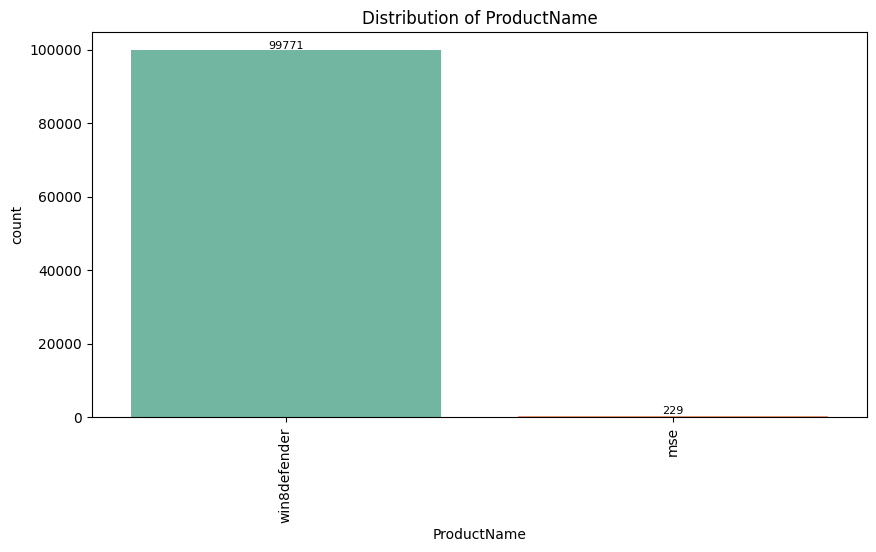

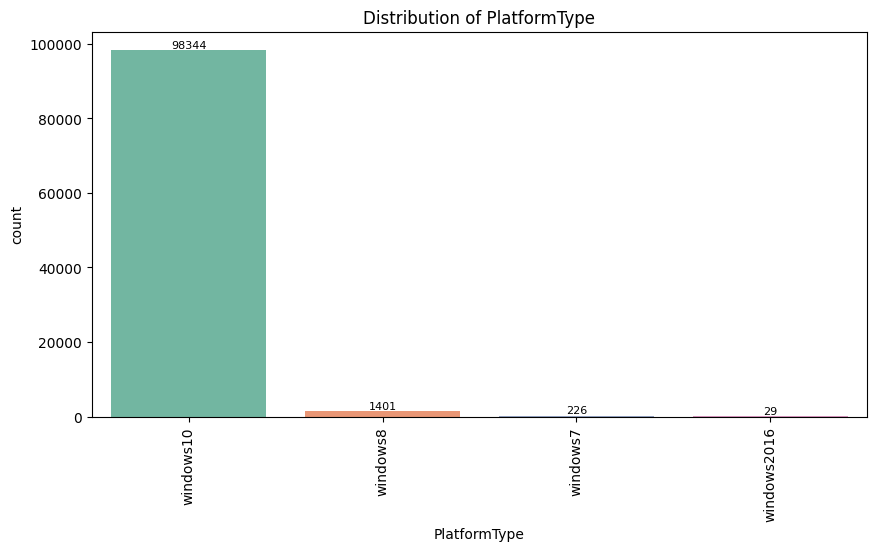

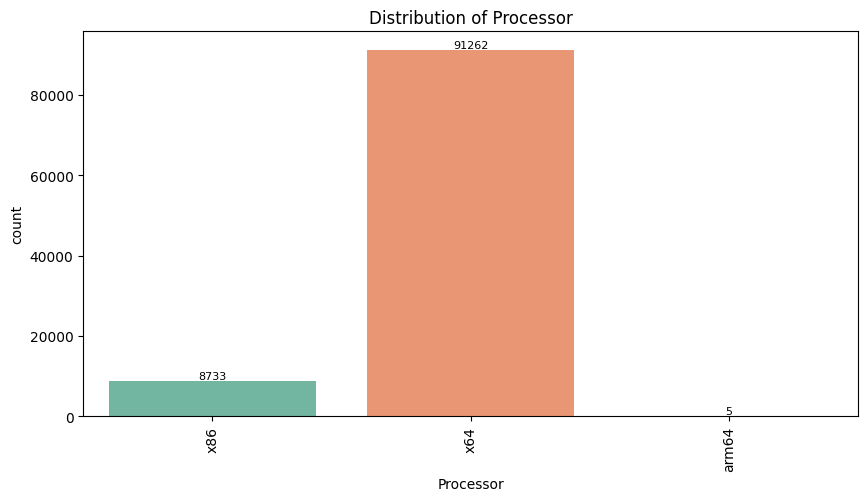

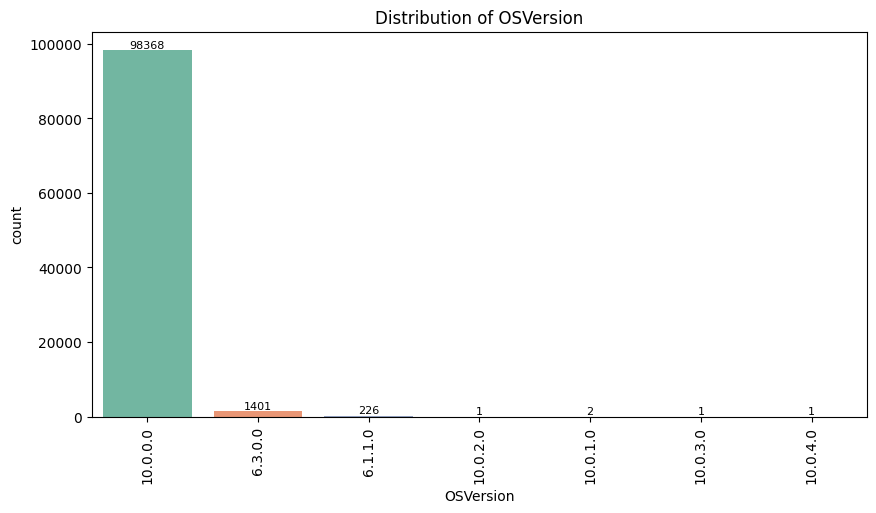

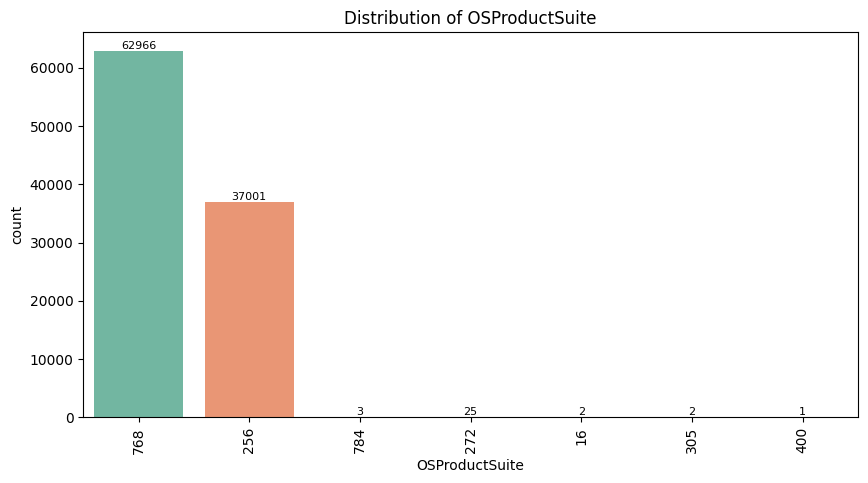

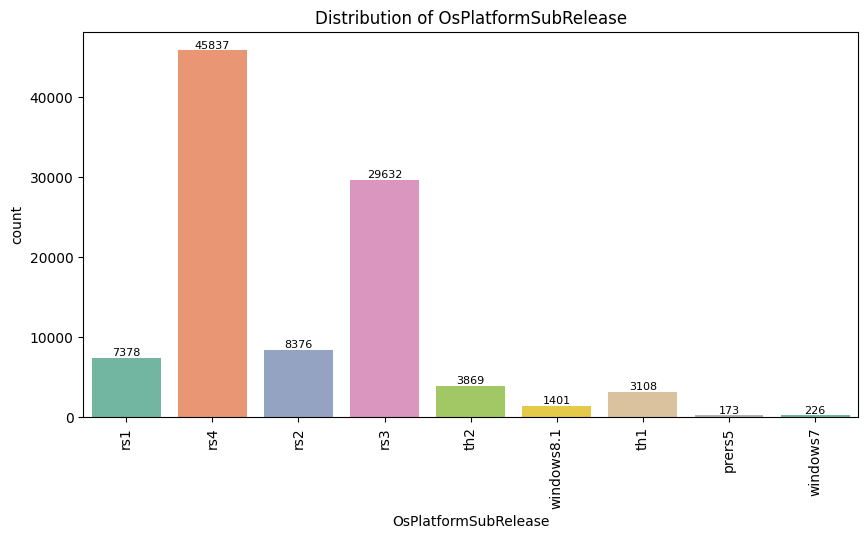

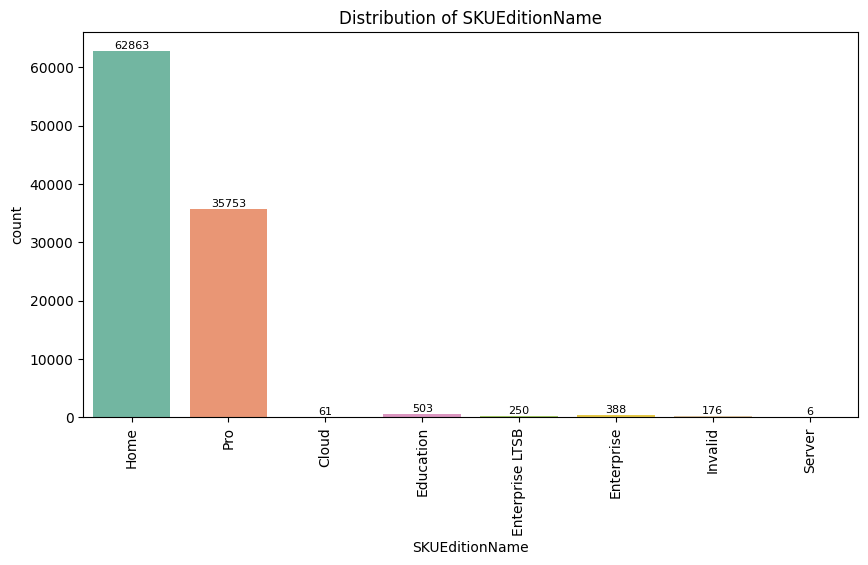

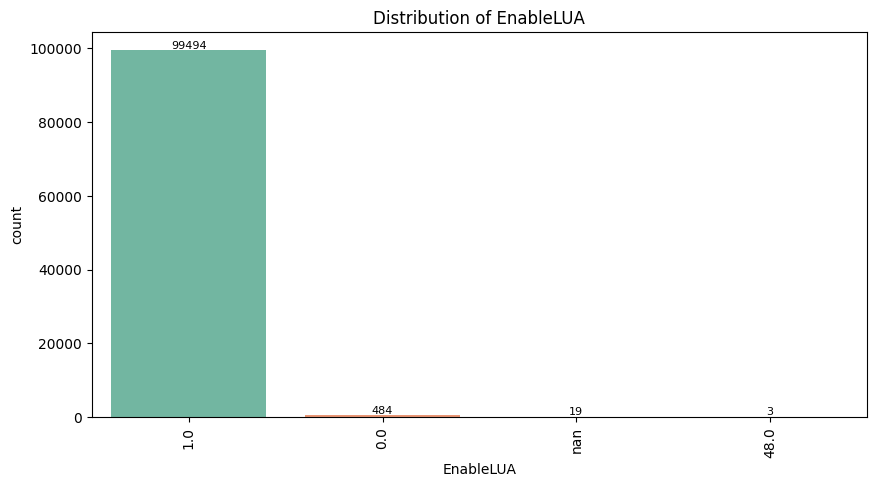

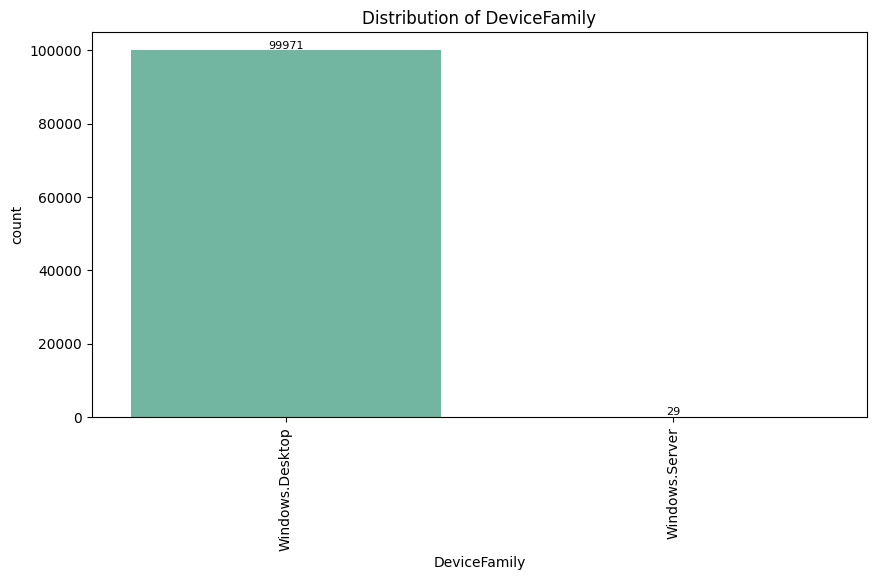

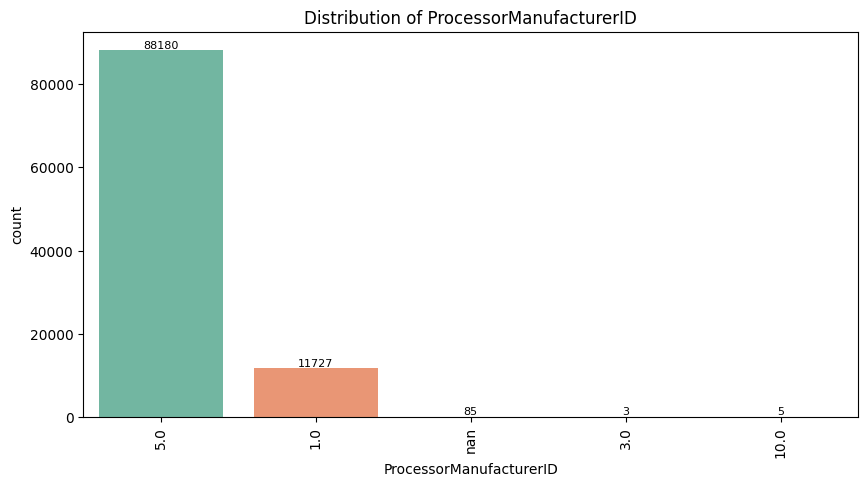

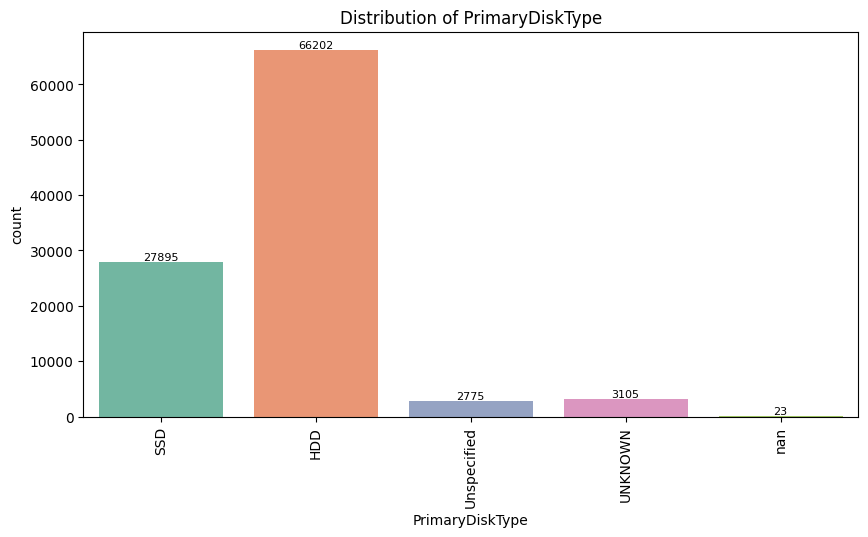

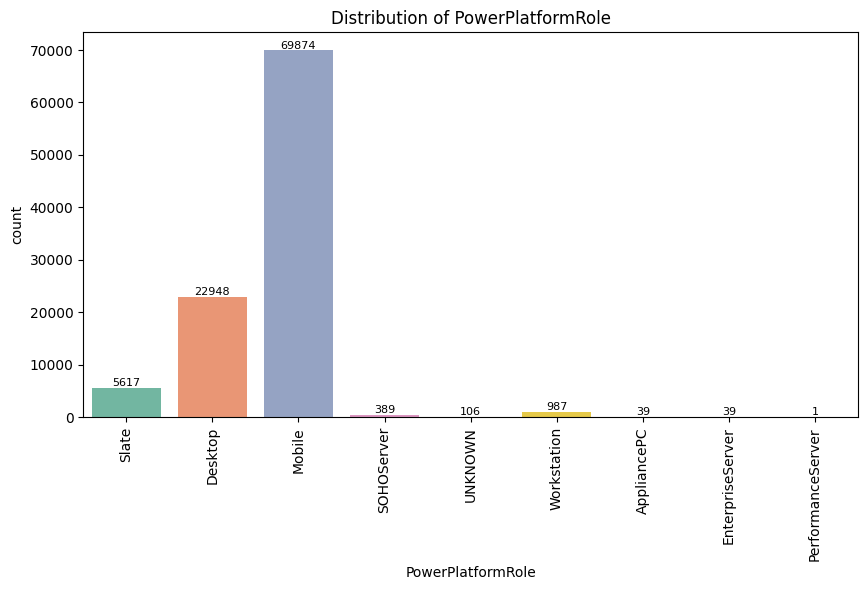

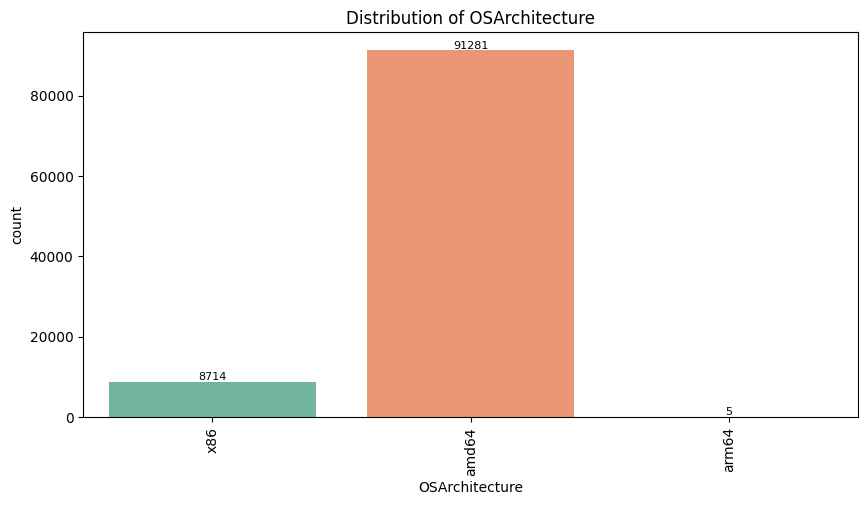

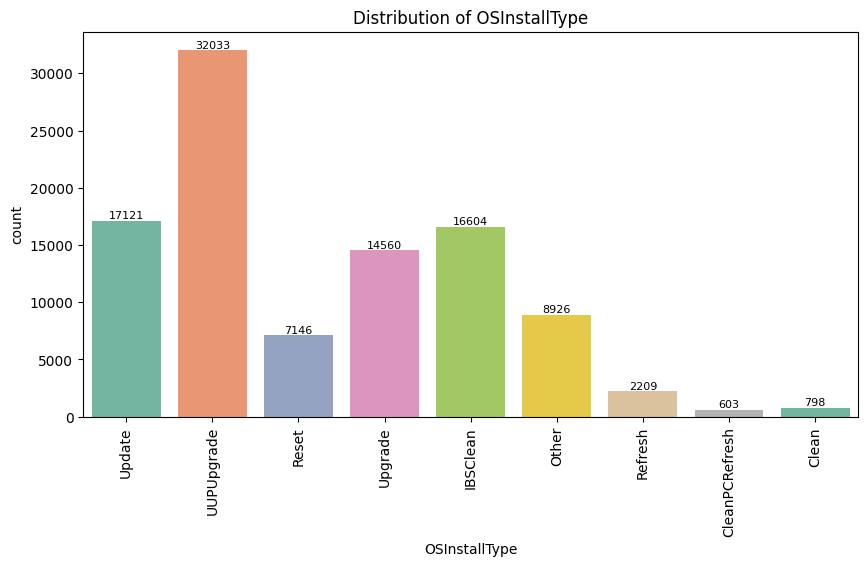

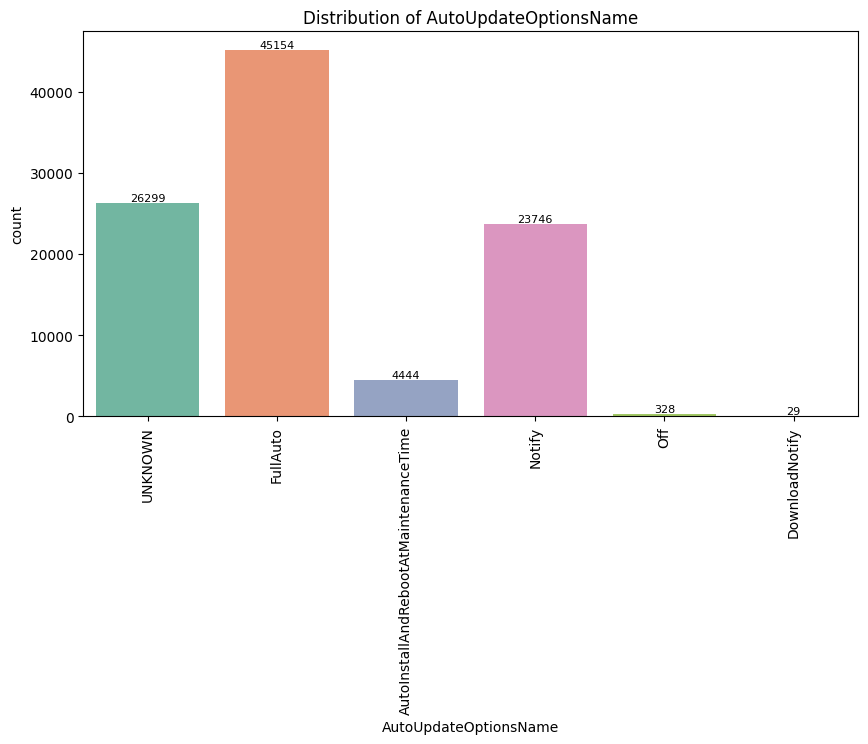

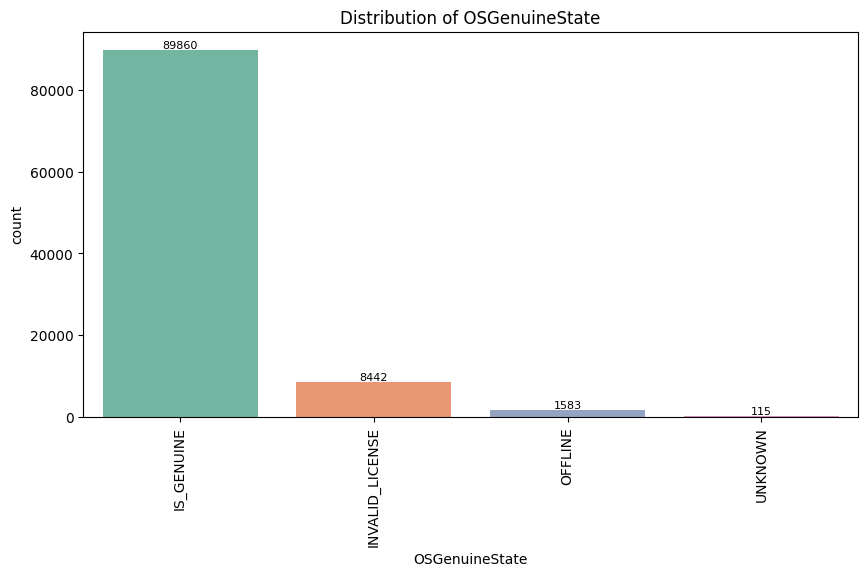

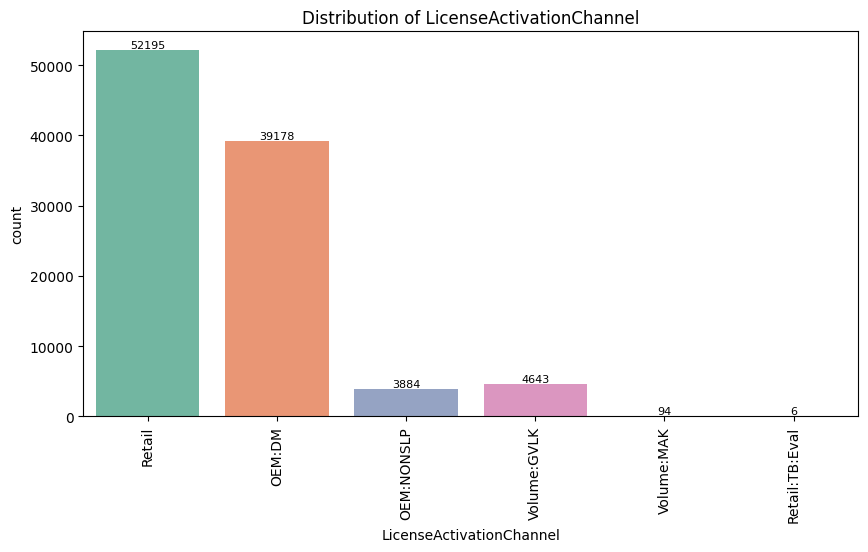

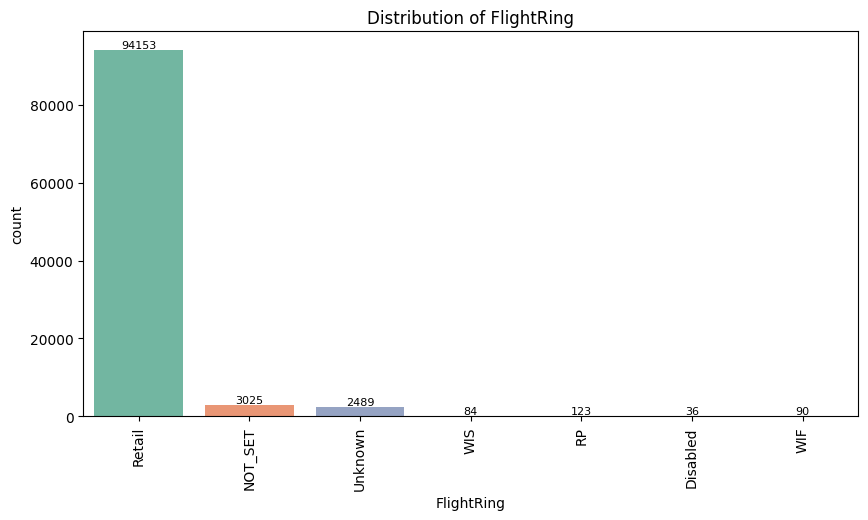

In [22]:
for col in Cat_columns:
    if X[col].nunique() < 10:
        plt.figure(figsize=(10, 5))
        # Create a countplot with the palette of your choice and order by frequency
        ax = sns.countplot(x=X[col].astype(str), data=X, palette='Set2')
        # Iterate over the containers and add data labels to each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', fontsize=8, label_type='edge')
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=90)
        plt.show()

**Plot categorical columns**

**Plot numerical cols**

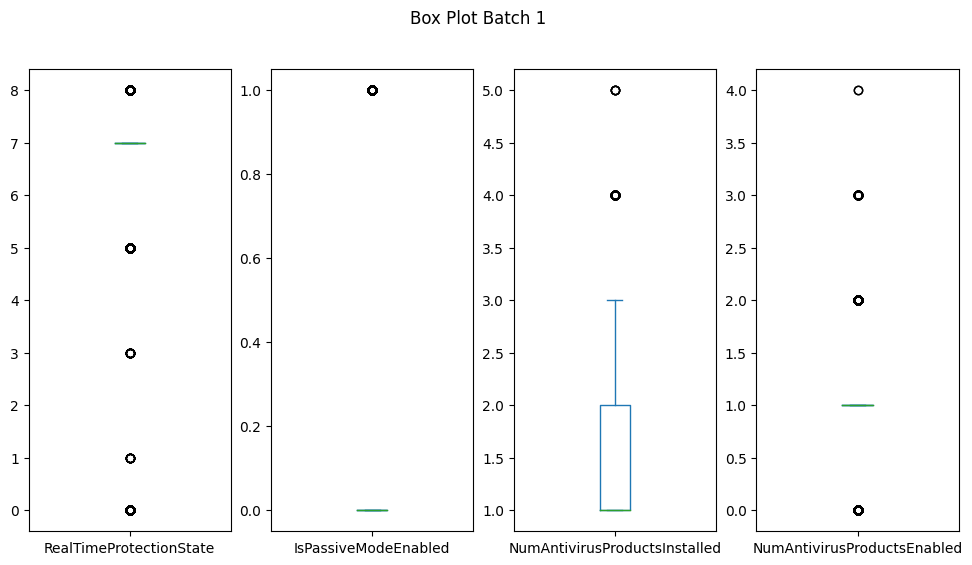

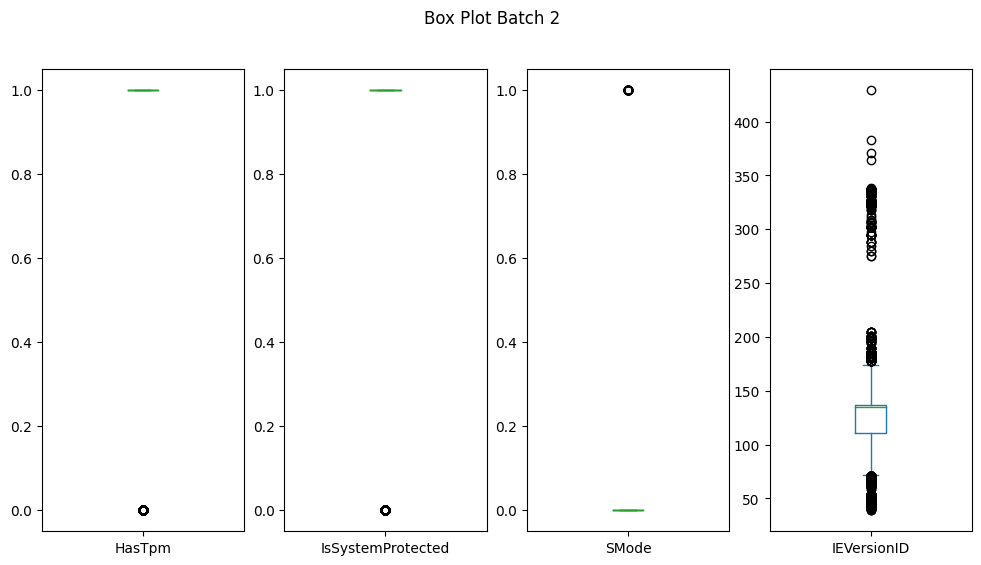

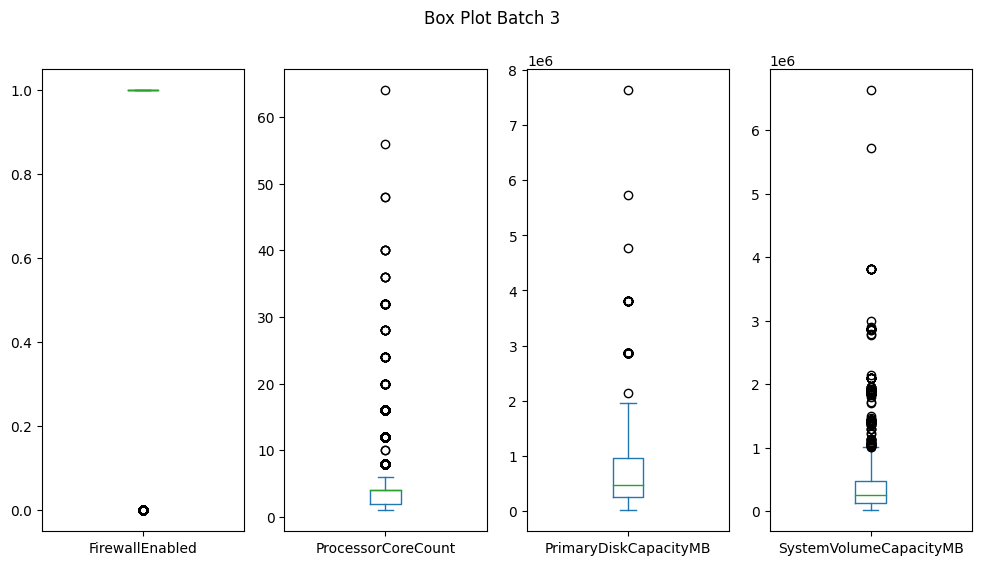

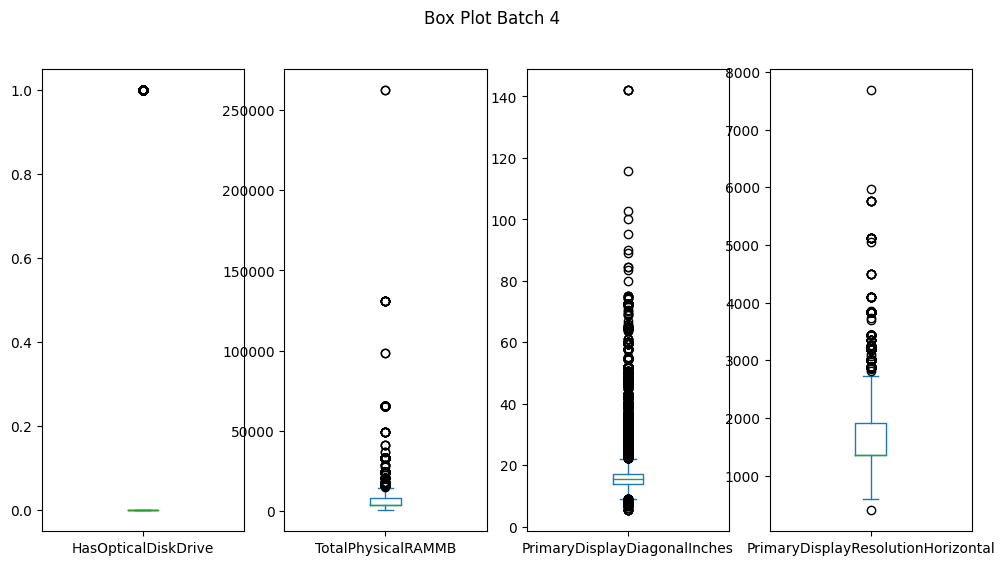

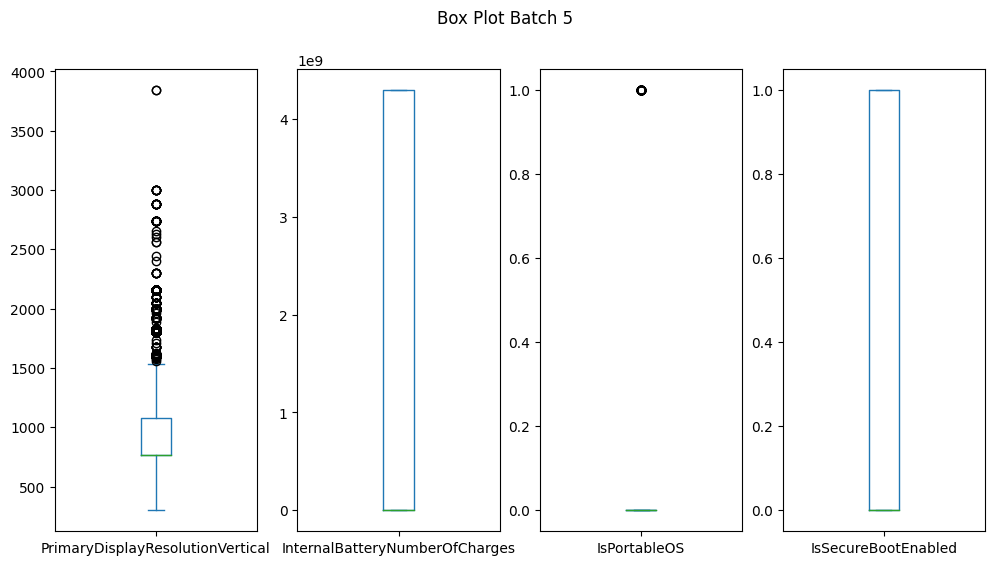

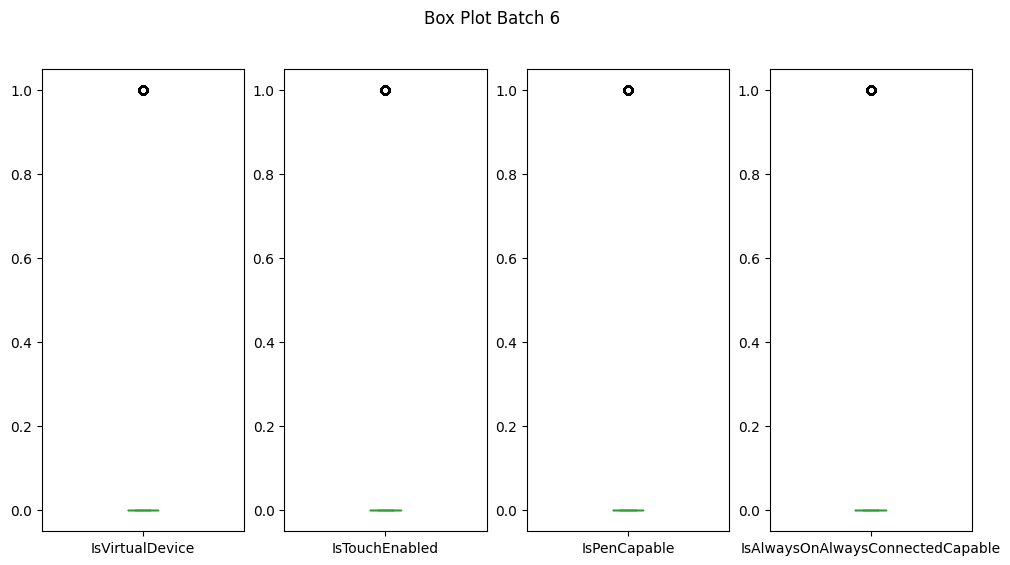

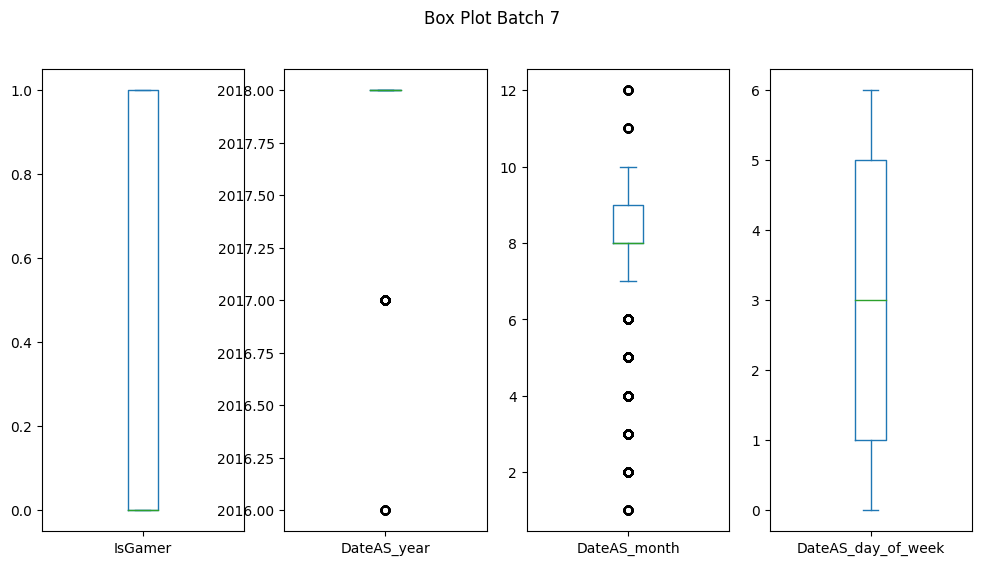

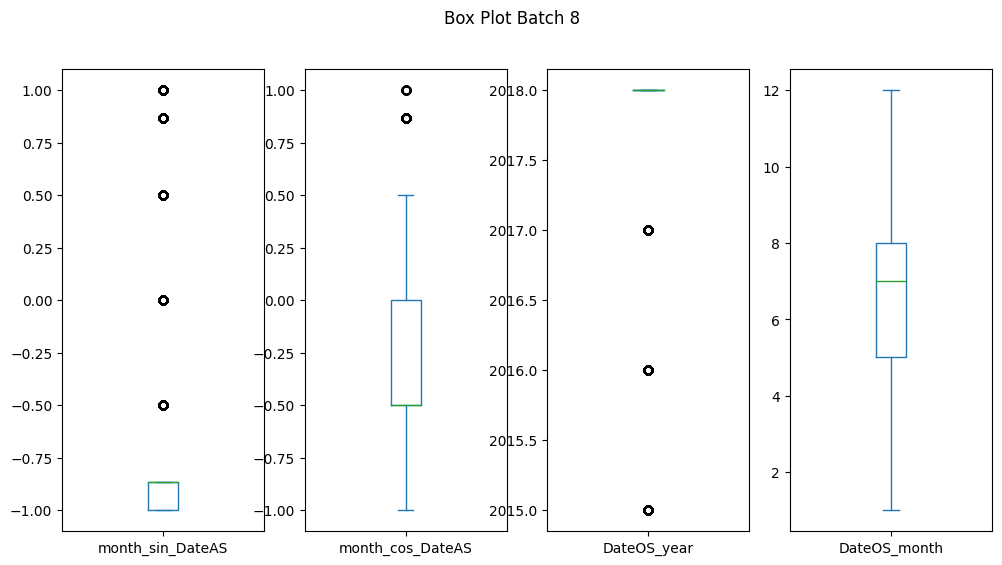

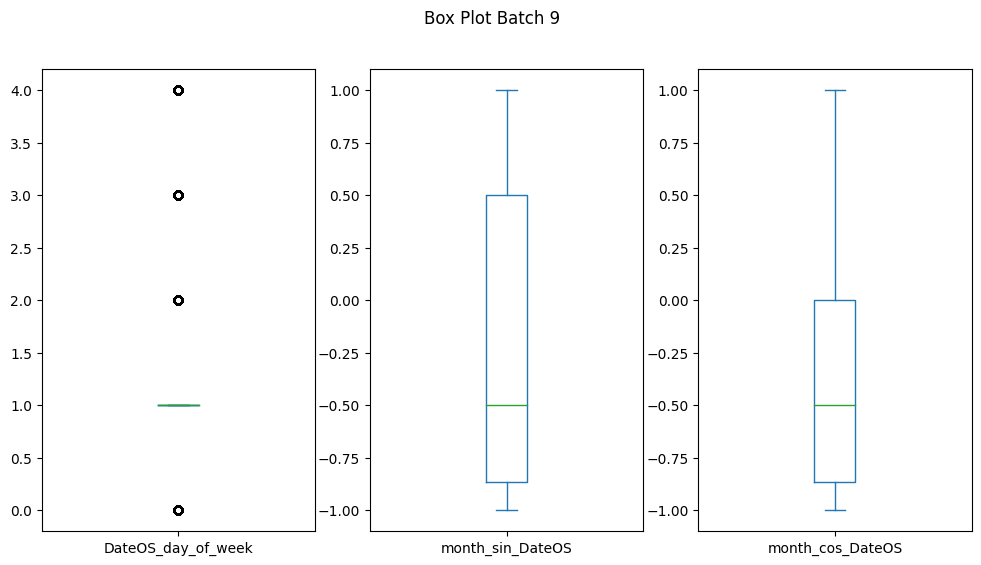

In [23]:
batch_size = 4 

# Loop through batches of 4 columns at a time
for i in range(0, len(numerical_columns), batch_size):
    cols = numerical_columns[i:i+batch_size]  # Get the current batch of columns
    X[cols].plot(kind='box', subplots=True, layout=(1, len(cols)), figsize=(12, 6))
    plt.suptitle(f"Box Plot Batch {i//batch_size + 1}")
    plt.show()

**Train data is splitted to train and validation**

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Apply preprocessing steps such as simple imputer with strategy mode and standard scaler for numeric columns. Ordinal encoder  followed by simple imputer with strategy mode followed by standard scaler**


In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Encode categories
             # Scale encoded values
        ]), Cat_columns),  # Apply to categorical columns
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
            ('scaler', StandardScaler()),  # Scale numerical values
            ('Robust', RobustScaler())
        ]), numerical_columns)  # Apply to numerical columns
    ]
)

# Fit on training data
preprocessor.fit(X_train)

# Transform training data
X_train_transformed = preprocessor.transform(X_train)

# Get feature names after transformation
transformed_columns = (Cat_columns.tolist() + numerical_columns.tolist())

# Convert transformed data to DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_columns)

In [26]:


# Transform training data
X_val_transformed = preprocessor.transform(X_val)

# Get feature names after transformation
transformed_columns = (Cat_columns.tolist() + numerical_columns.tolist())

# Convert transformed data to DataFrame
X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=transformed_columns)

**Check the shape of training and validation sets**

In [27]:
print(X_train_transformed_df.shape)
print(X_val_transformed_df.shape)

(80000, 79)
(20000, 79)


# Select K Best Categorical features

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
selector_cat = SelectKBest(chi2, k=18)
X_cat_selected = selector_cat.fit_transform(X_train_transformed_df[Cat_columns], y_train)

# Get scores and p-values for categorical features
cat_scores = selector_cat.scores_
cat_pvalues = selector_cat.pvalues_

# Create a DataFrame to view categorical feature scores
cat_feature_scores = pd.DataFrame({
    'Feature': Cat_columns,
    'Chi2_Score': cat_scores,
    'P-Value': cat_pvalues
}).sort_values(by='Chi2_Score', ascending=False)
print("Categorical Feature Scores:")
print(cat_feature_scores)

Categorical Feature Scores:
                     Feature     Chi2_Score        P-Value
4          AntivirusConfigID  118128.577092   0.000000e+00
3           SignatureVersion   14298.294463   0.000000e+00
6                     CityID    6360.924342   0.000000e+00
23          ProcessorModelID    5924.787647   0.000000e+00
42         FirmwareVersionID    2563.928944   0.000000e+00
31       OSBuildRevisionOnly    1950.731464   0.000000e+00
27          NumericOSVersion    1645.095357   0.000000e+00
20                 OEMNameID    1438.121460   0.000000e+00
28            OSArchitecture     822.537055  6.794911e-181
21                OEMModelID     658.384843  3.354215e-145
15                OSBuildLab     507.637629  2.071101e-112
41    FirmwareManufacturerID     430.891432   1.039605e-95
8        LocaleEnglishNameID     294.880314   4.297443e-66
32                 OSEdition     264.235064   2.048337e-59
33         OSSkuFriendlyName     263.069205   3.677203e-59
5                  CountryID

In [29]:
# Compute correlation matrix
corr_matrix = X_train_transformed_df.corr()

# Unstack and reset index
high_corr = pd.DataFrame(corr_matrix.unstack().reset_index())
high_corr.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr[(high_corr['Correlation'] >0.85) & (high_corr['Feature_1'] != high_corr['Feature_2'] )]

,Feature_1,Feature_2,Correlation
722,PlatformType,OSVersion,0.997418
818,Processor,OSArchitecture,0.993131
878,OSVersion,PlatformType,0.997418
975,OSBuildNumber,NumericOSVersion,0.899267
978,OSBuildNumber,OSBuildNumberOnly,0.933308
1296,SKUEditionName,OSEdition,0.896720
1297,SKUEditionName,OSSkuFriendlyName,0.890442
2145,NumericOSVersion,OSBuildNumber,0.899267
2163,NumericOSVersion,OSBuildNumberOnly,0.947171
2222,OSArchitecture,Processor,0.993131


**Keep only one feature if 2 features are highly correlated based on above results**


**Select K Best features and using f classifier**

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

In [31]:
selector = SelectKBest(score_func=f_classif, k=20)



X_num_selected = selector.fit_transform(X_train_transformed_df[numerical_columns], y_train)

# Get scores and p-values for categorical features
num_scores = selector.scores_
num_pvalues = selector.pvalues_

# Create a DataFrame to view categorical feature scores
num_feature_scores = pd.DataFrame({
    'Feature': numerical_columns,
    'F_Score': num_scores,
    'P-Value': num_pvalues
}).sort_values(by='F_Score', ascending=False)
print("Numerical Feature Scores:")
print(num_feature_scores)

Numerical Feature Scores:
                               Feature      F_Score       P-Value
2        NumAntivirusProductsInstalled  1846.976116  0.000000e+00
28                    month_sin_DateAS   433.279132  5.652437e-96
23    IsAlwaysOnAlwaysConnectedCapable   378.298460  4.571487e-84
13                  TotalPhysicalRAMMB   357.074478  1.820180e-79
5                    IsSystemProtected   306.952950  1.353302e-68
24                             IsGamer   293.570641  1.086525e-65
9                   ProcessorCoreCount   270.327263  1.211358e-60
10               PrimaryDiskCapacityMB   219.073132  1.675596e-49
21                      IsTouchEnabled   196.946579  1.094640e-44
0              RealTimeProtectionState   192.942528  8.147627e-44
1                 IsPassiveModeEnabled   153.239920  3.656648e-35
26                        DateAS_month   146.842226  9.095940e-34
20                     IsVirtualDevice   142.054067  1.008784e-32
3          NumAntivirusProductsEnabled   116.57817

**Remove columns with high p values and 1 among highly correlated columns**

In [32]:
Del_Cols=['AntivirusConfigID','SignatureVersion','CityID','OSUILocaleID','ProcessorModelID','FirmwareVersionID','OSBuildRevisionOnly','OEMNameID','OEMModelID','FirmwareManufacturerID','LocaleEnglishNameID','CountryID','GeoRegionID','IsSecureBootEnabled','OSSkuFriendlyName','OSVersion','OSArchitecture','NumericOSVersion','OSBuildNumber','PrimaryDisplayResolutionHorizontal','SKUEditionName','OSGenuineState','PlatformType','MDC2FormFactor','FlightRing','ProductName','EnableLUA']

In [33]:
X_train_transformed_df.drop(columns=Del_Cols,inplace=True)
X_val_transformed_df.drop(columns=Del_Cols,inplace=True)


In [34]:
Del_cols_num=['IsPenCapable','InternalBatteryNumberOfCharges','SystemVolumeCapacityMB','DateOS_month','SMode','PrimaryDisplayResolutionVertical','month_cos_DateAS','FirewallEnabled','HasTpm','IsPortableOS','DateOS_day_of_week','DateAS_day_of_week']

In [35]:
print(X_train_transformed_df.shape)
print(X_val_transformed_df.shape)

(80000, 52)
(20000, 52)


In [36]:
X_train_transformed_df.drop(columns=Del_cols_num,inplace=True)

In [37]:

X_val_transformed_df.drop(columns=Del_cols_num,inplace=True)

In [38]:
print(X_train_transformed_df.shape)
print(X_val_transformed_df.shape)

(80000, 40)
(20000, 40)


# Modelling

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score

Accuracy: 0.5998

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.53      0.57     39597
           1       0.59      0.67      0.63     40403

    accuracy                           0.60     80000
   macro avg       0.60      0.60      0.60     80000
weighted avg       0.60      0.60      0.60     80000



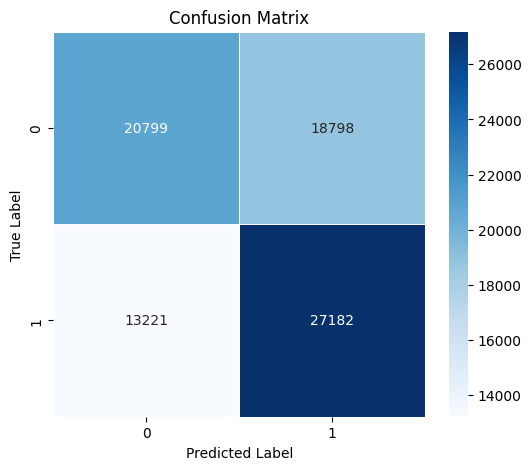

In [40]:
log_reg = LogisticRegression(solver= 'sag', penalty= 'l2', max_iter= 200, C= 0.1)
log_reg.fit(X_train_transformed_df, y_train)

# Make predictions
y_pred = log_reg.predict(X_train_transformed_df)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.5994

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      9878
           1       0.59      0.68      0.63     10122

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000

Accuracy: 0.5994


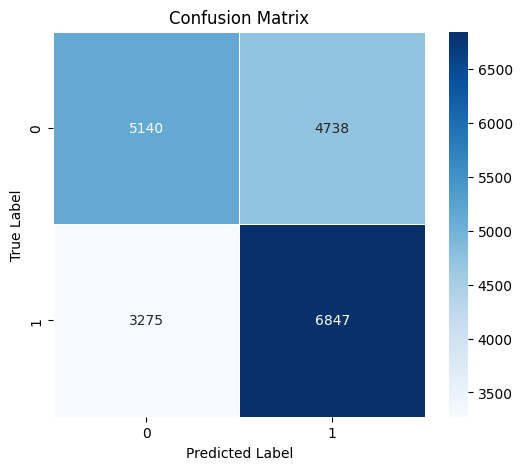

In [52]:
y_val_pred = log_reg.predict(X_val_transformed_df)
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_val, y_val_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Hyper parameter tuning for logistic regression

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 500]
}
# Perform Grid Search
grid_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid,
    n_iter=20, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_transformed_df, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# XGBoost Algorithm

Accuracy: 0.6506

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63     39597
           1       0.64      0.69      0.67     40403

    accuracy                           0.65     80000
   macro avg       0.65      0.65      0.65     80000
weighted avg       0.65      0.65      0.65     80000



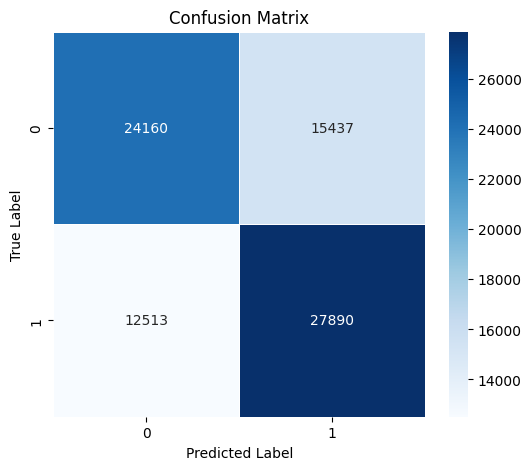

In [53]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42,subsample=0.8,colsample_bytree=1)



# Train the model
model.fit(X_train_transformed_df, y_train)

# Make predictions
y_pred = model.predict(X_train_transformed_df)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Hyper parameter tuning using XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_iter=20, random_state=42)
random_search.fit(X_train_transformed_df, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

Accuracy: 0.6240

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61      9878
           1       0.62      0.66      0.64     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000

Accuracy: 0.6240


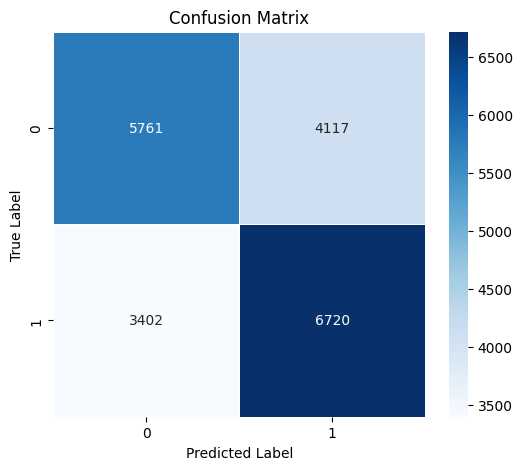

In [54]:
y_val_pred = model.predict(X_val_transformed_df)
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_val, y_val_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Random Forest Classifier

Accuracy: 0.8273375

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     39597
           1       0.82      0.85      0.83     40403

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



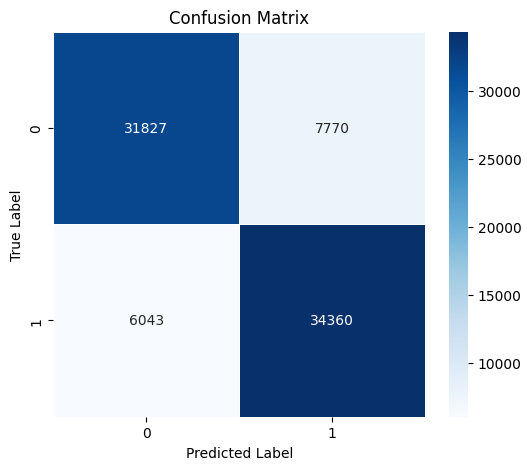

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=400,  random_state=42,min_samples_leaf=5,max_features='sqrt',max_depth=30)


rf_model.fit(X_train_transformed_df, y_train)
y_pred = rf_model.predict(X_train_transformed_df)

print("Accuracy:", accuracy_score(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))

cm = confusion_matrix(y_train, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Hyper parameter tuning Random forest

In [ ]:
param_dist = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [1,3,5],
    'max_features': ['sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, 
                                   n_iter=20, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_transformed_df, y_train)

# Best Parameters
print("Best Parameters:", random_search.best_params_)

Accuracy: 0.6207

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61      9878
           1       0.62      0.65      0.63     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000

Accuracy: 0.6207


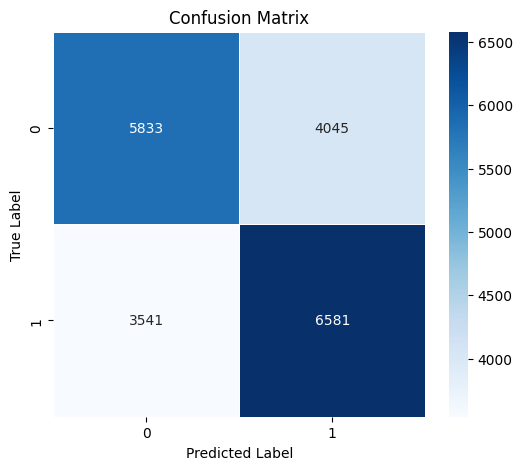

In [56]:
y_val_pred = rf_model.predict(X_val_transformed_df)
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")
cm = confusion_matrix(y_val, y_val_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Light GBM

In [57]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(subsample= 0.8, num_leaves= 31, n_estimators= 100, min_child_samples= 50, max_depth= -1, learning_rate= 0.1, colsample_bytree= 0.7)
lgb_clf.fit(X_train_transformed_df, y_train)

[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151


LGBMClassifier(colsample_bytree=0.7, min_child_samples=50, subsample=0.8)

In [50]:


lgb_clf2 = lgb.LGBMClassifier()
param_grid = {
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [10, 20, 30, 50]
}
random_search = RandomizedSearchCV(
    estimator=lgb_clf2,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_transformed_df, y_train)
print("Best Hyperparameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151
Best Hyperparameters: {'subsample': 0.9, 'num_leaves': 40, 'n_estimators': 100, 'min_child_samples': 10, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


Accuracy: 0.6431125

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     39597
           1       0.64      0.68      0.66     40403

    accuracy                           0.64     80000
   macro avg       0.64      0.64      0.64     80000
weighted avg       0.64      0.64      0.64     80000



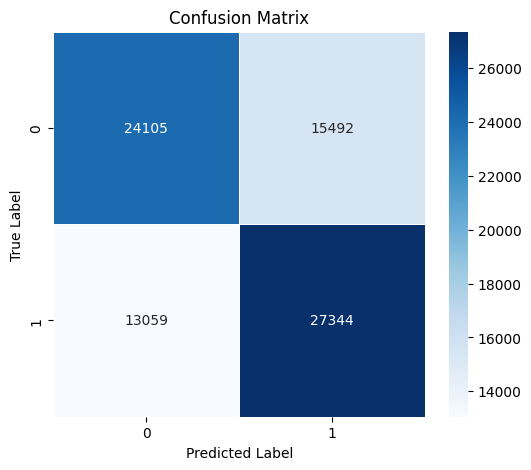

In [58]:


y_pred = lgb_clf.predict(X_train_transformed_df)

print("Accuracy:", accuracy_score(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.6230

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9878
           1       0.62      0.66      0.64     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000

Accuracy: 0.6230


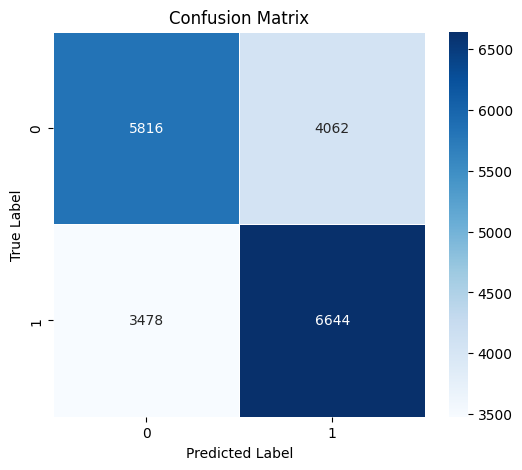

In [59]:
y_val_pred = lgb_clf.predict(X_val_transformed_df)
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_val, y_val_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Checking PCA on best model

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA to reduce the dimensionality (e.g., to 2 components for visualization)
pca = PCA(n_components=30)

# Apply PCA on the transformed data
X_pca = pca.fit_transform(X_train_transformed_df)

# Print the explained variance ratio to understand how much variance each component captures
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [8.48960755e-01 5.98131466e-02 3.00267222e-02 1.53385433e-02
 1.18463996e-02 9.69480649e-03 4.28420246e-03 3.24068139e-03
 2.49132034e-03 1.59600033e-03 1.41166628e-03 1.14835998e-03
 9.32762013e-04 8.81725216e-04 7.91004598e-04 7.21781499e-04
 6.37790940e-04 6.11239539e-04 5.60442507e-04 5.42718303e-04
 5.29743800e-04 4.95482027e-04 4.84290816e-04 3.98217508e-04
 3.79238352e-04 3.60550416e-04 2.92588286e-04 2.50737368e-04
 2.24677085e-04 1.88932688e-04]


In [61]:
X_pca_val=pca.transform(X_val_transformed_df)

In [62]:
import lightgbm as lgb
lgb_clf3 = lgb.LGBMClassifier(subsample= 0.8, num_leaves= 31, n_estimators= 100, min_child_samples= 50, max_depth= -1, learning_rate= 0.1, colsample_bytree= 0.7)
lgb_clf3.fit(X_pca, y_train)

[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151


LGBMClassifier(colsample_bytree=0.7, min_child_samples=50, subsample=0.8)

Accuracy: 0.654275

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64     39597
           1       0.65      0.69      0.67     40403

    accuracy                           0.65     80000
   macro avg       0.65      0.65      0.65     80000
weighted avg       0.65      0.65      0.65     80000



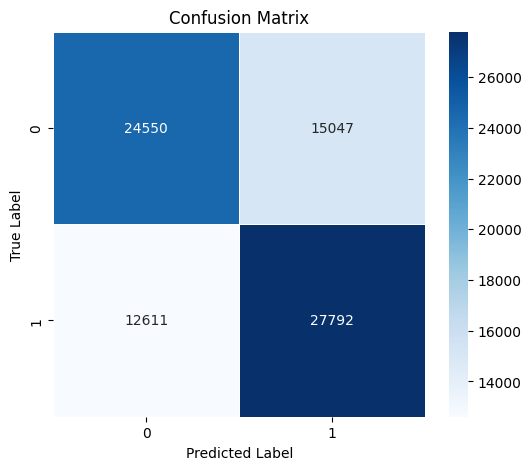

In [63]:
y_pred = lgb_clf3.predict(X_pca)

print("Accuracy:", accuracy_score(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.6105

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      9878
           1       0.61      0.65      0.63     10122

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000

Accuracy: 0.6105


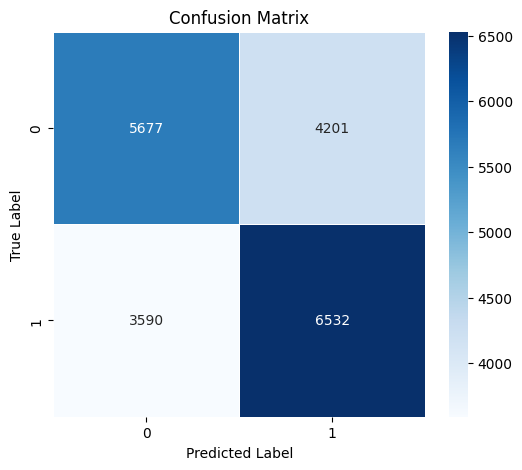

In [64]:
y_val_pred = lgb_clf3.predict(X_pca_val)
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_val, y_val_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Compare different models

<Figure size 1000x600 with 0 Axes>

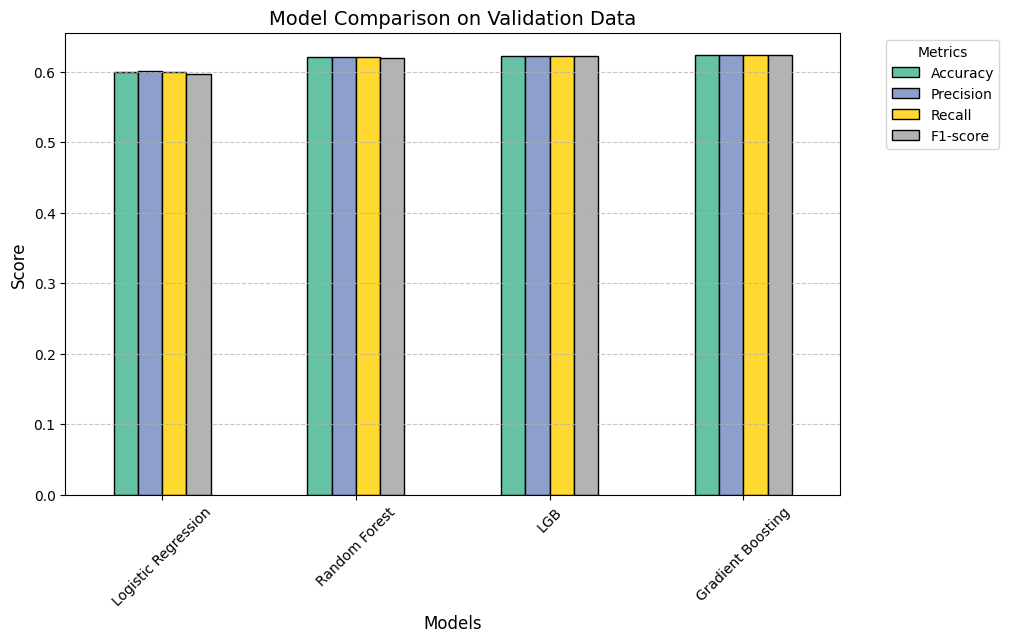

In [65]:
# Define models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "LGB": lgb_clf,
    "Gradient Boosting": model
}

# Store results
results = {}


# Evaluate each model
for name, model in models.items():
    y_test_pred = model.predict(X_val_transformed_df)  # Make predictions
    
    # Calculate metrics correctly using y_test_pred
    accuracy = accuracy_score(y_val, y_test_pred)
    precision = precision_score(y_val, y_test_pred, average='weighted')
    recall = recall_score(y_val, y_test_pred, average='weighted')
    f1 = f1_score(y_val, y_test_pred, average='weighted')

    results[name] = [accuracy, precision, recall, f1]

# Convert to DataFrame
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
results_df = pd.DataFrame(results, index=metrics)

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
results_df.T.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')

plt.title("Model Comparison on Validation Data", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

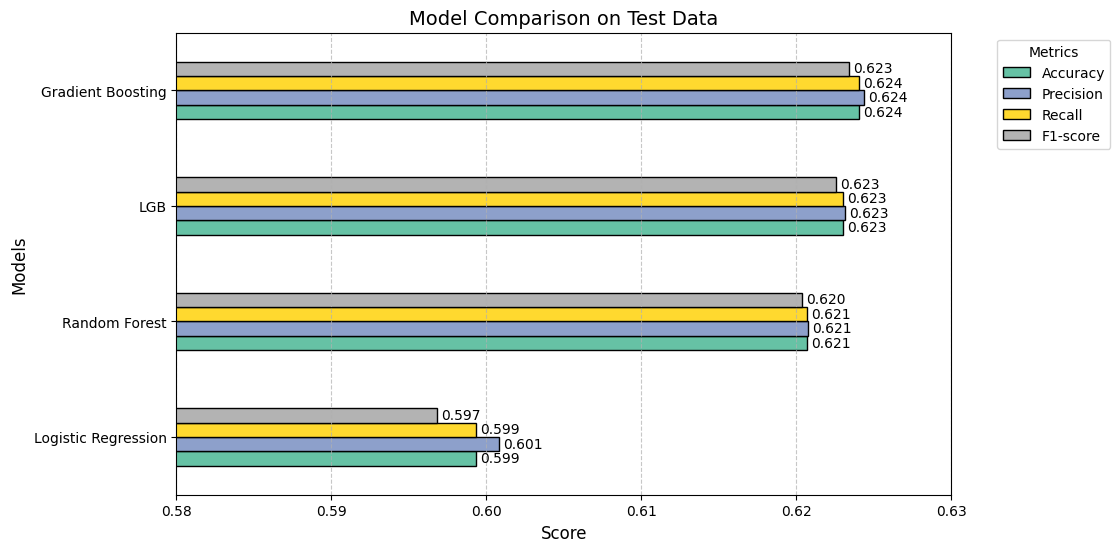

In [66]:
import matplotlib.pyplot as plt

# Plot horizontal bar chart
ax = results_df.T.plot(kind='barh', figsize=(10, 6), colormap='Set2', edgecolor='black')

# Zoom in on the X-axis to highlight small differences
plt.xlim(0.58, 0.63)

# Titles and labels
plt.title("Model Comparison on Test Data", fontsize=14)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.3f', fontsize=10, padding=3)

# Show the plot
plt.show()

# Test data execution

**Extract test data**

In [ ]:
X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv") 

In [ ]:
X_test.info()

**Clean date feature**

In [ ]:
X_test['DateOS'] = pd.to_datetime(X_test['DateOS'])
# Feature engineering
X_test['DateOS_year'] = X_test['DateOS'].dt.year
X_test['DateOS_month'] = X_test['DateOS'].dt.month
X_test['DateOS_day_of_week'] = X_test['DateOS'].dt.dayofweek

# Cyclical encoding
X_test['month_sin_DateOS'] = np.sin(2 * np.pi * X_test['DateOS_month'] / 12)
X_test['month_cos_DateOS'] = np.cos(2 * np.pi * X_test['DateOS_month'] / 12)

In [ ]:
X_test['DateAS'] = pd.to_datetime(X_test['DateAS'])

# Feature engineering
X_test['DateAS_year'] = X_test['DateAS'].dt.year
X_test['DateAS_month'] = X_test['DateAS'].dt.month
X_test['DateAS_day_of_week'] = X_test['DateAS'].dt.dayofweek

# Cyclical encoding
X_test['month_sin_DateAS'] = np.sin(2 * np.pi * X_test['DateAS_month'] / 12)
X_test['month_cos_DateAS'] = np.cos(2 * np.pi * X_test['DateAS_month'] / 12)

**Drop Date features after transformation**

In [ ]:
X_test.drop(['DateAS','DateOS'], axis=1,inplace= True)

In [ ]:
X_test.drop(['IsBetaUser','IsFlightsDisabled','AutoSampleSubmissionEnabled','MachineID'], axis=1,inplace= True )

In [ ]:
categorical_columns = ['AntivirusConfigID', 'CountryID', 'CityID','GeoRegionID','LocaleEnglishNameID','OSBuildNumber', 'OSProductSuite','EnableLUA', 'OEMNameID',
       'OEMModelID','ProcessorManufacturerID',  'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID','OSUILocaleID', 'ProcessorModelID','FirmwareManufacturerID', 'FirmwareVersionID','RegionIdentifier']
X_test[categorical_columns] = X_test[categorical_columns].astype('category')

In [ ]:
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after transformation
transformed_columns = (Cat_columns.tolist() + numerical_columns.tolist())

# Convert transformed data to DataFrame
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_columns)



**Delete unwanted columns with least material info**

In [ ]:




Del_Cols=['AntivirusConfigID','SignatureVersion','CityID','OSUILocaleID','ProcessorModelID','FirmwareVersionID','OSBuildRevisionOnly','OEMNameID','OEMModelID','FirmwareManufacturerID','LocaleEnglishNameID','CountryID','GeoRegionID','IsSecureBootEnabled','OSSkuFriendlyName','OSVersion','OSArchitecture','NumericOSVersion','OSBuildNumber','PrimaryDisplayResolutionHorizontal','SKUEditionName','OSGenuineState','PlatformType','MDC2FormFactor','FlightRing','ProductName','EnableLUA']

X_test_transformed_df.drop(columns=Del_Cols,inplace=True)

Del_cols_num=['IsPenCapable','InternalBatteryNumberOfCharges','SystemVolumeCapacityMB','DateOS_month','SMode','PrimaryDisplayResolutionVertical','month_cos_DateAS','FirewallEnabled','HasTpm','IsPortableOS','DateOS_day_of_week','DateAS_day_of_week']
X_test_transformed_df.drop(columns=Del_cols_num,inplace=True)

In [ ]:
print(X_test_transformed_df.shape)
print(X_train_transformed_df.shape)
print(X_val_transformed_df.shape)

**Preprocess the test data**

**

# Submission using Logistic regression

In [ ]:
y_test_pred = log_reg.predict(X_test_transformed_df)



 
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "target": y_test_pred})
#submission.to_csv('submission.csv',index=False)


# Submission using XGBoost

In [ ]:
y_test_pred = model.predict(X_test_transformed_df)



 
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "target": y_test_pred})
#submission.to_csv('submission.csv',index=False)


# Submission using Random Forest

In [ ]:
y_test_pred = rf_model.predict(X_test_transformed_df)



 
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "target": y_test_pred})
#submission.to_csv('submission.csv',index=False)

# Submission using LGB

In [ ]:
y_test_pred = lgb_clf.predict(X_test_transformed_df)



 
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "target": y_test_pred})
submission.to_csv('submission.csv',index=False)

In [ ]:
submission